# Kiemelkedés jelensége (Emergence) - Ant sort

Egy 2D rendezési algoritmus: A cél, hogy a dobozokat egy kupacba hordják a robotok, és úgy, hogy mindegyik robot ugyanazt a feladatot hajtja végre. A robot nem léphet rá az objektumra, és 2 objektum se lehet egymáson.

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from IPython import display

A robotok feladatának meghatározása.

In [2]:
def MoveRobot(Position, Empty, Room):
    PickUp = np.zeros( 2, np.int)
    PutDown = np.zeros( 2, np.int)
    Step = 10
    Movement = (np.random.random(2)*(2*Step)-Step).astype(int)
    # if we find an object
    for a in range(-1, 2):
        for b in range(-1, 2):
            if -1 < Position[0] + a < Room.shape[0] and -1 < Position[1] + b < Room.shape[1]:
                if Room[Position[0] + a, Position[1] + b] == 1:
                    # if we do not have an object -> pick it up
                    if Empty: 
                        PickUp = [a, b]
                    else:
                        # if we have an object -> find an empty space and put it down
                        for c in range(-1, 2):
                            for d in range(-1, 2):
                                if -1 < Position[0] + c < Room.shape[0] and -1 < Position[1] + d < Room.shape[1]:
                                    if Room[Position[0] + c, Position[1] + d] == 0:
                                        PutDown = [c, d]
    return Movement, PickUp, PutDown

Pálya előkészítése.

<ipython-input-3-f8e0e246ae84>:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  RobotPositions=np.zeros((RobotsNum,2),np.int)
<ipython-input-3-f8e0e246ae84>:32: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 

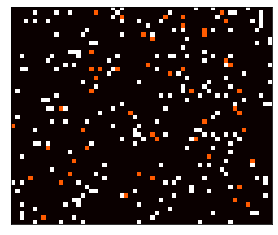

In [3]:
#robots
RoomSize=[50,60] #size of the room
Time=1000 #running time of the simulation
deltat=0.01 #show an image for this long
RobotMaxStep=10 #maximum amount a robot can step

#the states in the room are the following:
#0 empty
#0.5 robot
#1 object
Room=np.zeros(RoomSize) #black color codes empty room
#white color codes objects
#red color codes robots

RobotsNum=50 #number of robots
ObjectsNum=200 #number of objects

#place the robots randomly
RobotPositions=np.zeros((RobotsNum,2),np.int)
RobotEmpty=np.ones((RobotsNum,1))
for r in range(RobotsNum):
    NotPlaced=True
    while NotPlaced:
        TryToPlace=(np.random.random(2)*RoomSize).astype(int)
        if Room[TryToPlace[0],TryToPlace[1]]==0: #if room is empty
            Room[TryToPlace[0],TryToPlace[1]]=0.5
            RobotPositions[r,:]=TryToPlace
            NotPlaced=False


#place the objects
ObjectPositions=np.zeros((ObjectsNum,2),np.int)
for o in range(ObjectsNum):
    NotPlaced=True
    while NotPlaced:
        TryToPlace=(np.random.random(2)*RoomSize).astype(int)
        if Room[TryToPlace[0],TryToPlace[1]]==0: #if room is empty
            Room[TryToPlace[0],TryToPlace[1]]=1
            ObjectPositions[r,:]=TryToPlace
            NotPlaced=False


#show the map
fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 1, 1)
ax1.grid(False)
plt.xticks([])
plt.yticks([])
ax1.imshow(Room,cmap="hot",clim=(0.0, 1.0))

Szimuláció futtatása.

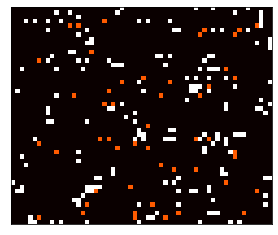

KeyboardInterrupt: 

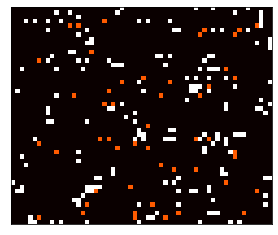

In [4]:
#show the map
fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 1, 1)
ax1.grid(False)
plt.xticks([])
plt.yticks([])
ax1.imshow(Room,cmap="hot",clim=(0.0, 1.0))
display.clear_output(wait=True)
display.display(plt.gcf())
time.sleep(deltat)

#run the simulation
for t in range(Time):
    for r in range(RobotsNum):
        [Movement, PickUp, PutDown] = MoveRobot(RobotPositions[r,:],RobotEmpty[r],Room)
   
        #check the return values:
        #can only handle objects close to the robot
        Movement=np.minimum([RobotMaxStep, RobotMaxStep],np.maximum(Movement,[-RobotMaxStep,-RobotMaxStep]))
        PickUp=np.minimum([1, 1],np.maximum(PickUp,[-1,-1]))
        PutDown=np.minimum([1, 1],np.maximum(PutDown,[-1,-1]))
        RobotActed=False;

        #first priortiy pickup object
        if any(PickUp!=[0,0]) and RobotEmpty[r]==True:
            RobotActed=True
            Desiredposition=RobotPositions[r,:]+PickUp
            if (all(Desiredposition>-1)) and (all(Desiredposition<(RoomSize))):
                if Room[Desiredposition[0],Desiredposition[1]]==1:
                    RobotEmpty[r]=False
                    Room[Desiredposition[0],Desiredposition[1]]=0

        #second priority putting down an object
        if RobotActed==False and any(PutDown!=[0,0]) and  RobotEmpty[r]==False:
            RobotActed=True
            Desiredposition=RobotPositions[r,:]+PutDown
            if (all(Desiredposition>-1)) and (all(Desiredposition<(RoomSize))):
                if Room[Desiredposition[0],Desiredposition[1]]==0:
                    RobotEmpty[r]=True
                    Room[Desiredposition[0],Desiredposition[1]]=1

        Desiredposition=RobotPositions[r,:]+Movement
        #check if possible
        if (all(Desiredposition>-1)) and (all(Desiredposition<(RoomSize))):
            if Room[Desiredposition[0],Desiredposition[1]]==0:
                Room[RobotPositions[r,0],RobotPositions[r,1]]=0
                RobotPositions[r,:]=[Desiredposition[0],Desiredposition[1]]
                Room[Desiredposition[0],Desiredposition[1]]=0.5
    #show map
    ax1.imshow(Room,cmap="hot",clim=(0.0, 1.0))
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(deltat)